<a href="https://colab.research.google.com/github/MuhammadMoaviaKhan/Data-Analytics-Projects/blob/main/Apple_Stocks_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

from google.colab import files
upload = files.upload()

Saving apple_stock.csv to apple_stock.csv


In [ ]:
df = pd.read_csv(io.BytesIO(upload['apple_stock.csv']))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB


In [ ]:
from datetime import datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [ ]:
df.describe().round()

,Open,High,Low,Close,Adj Close,Volume
count,2475.0,2475.0,2475.0,2475.0,2475.0,2.475000e+03
mean,76.0,77.0,75.0,76.0,74.0,1.380565e+08
std,55.0,55.0,54.0,55.0,55.0,8.399674e+07
min,18.0,18.0,18.0,18.0,16.0,3.145820e+07
25%,30.0,30.0,29.0,30.0,27.0,8.300500e+07
50%,48.0,48.0,47.0,48.0,46.0,1.134760e+08
75%,132.0,134.0,130.0,132.0,130.0,1.682138e+08
max,196.0,198.0,195.0,196.0,196.0,1.065523e+09


In [ ]:
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
px.line(df ,x= df.index, y= df['Volume'], title= ('Daily Volume of Stocks'))

In [ ]:
px.line(df, x= df.index, y= ['Open', 'High', 'Low', 'Close'], title= 'Apple Stock Price [(Open, High, Low & Close) Price] (Line Chart)',
        color_discrete_sequence=['blue', 'lightgreen', 'red', 'purple'])

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])])
fig.update_layout(title='Apple Stock Price [(Open, High, Low & Close) Price] (Candlestick Chart)', xaxis_title='Date', yaxis_title='Price')
fig.show()

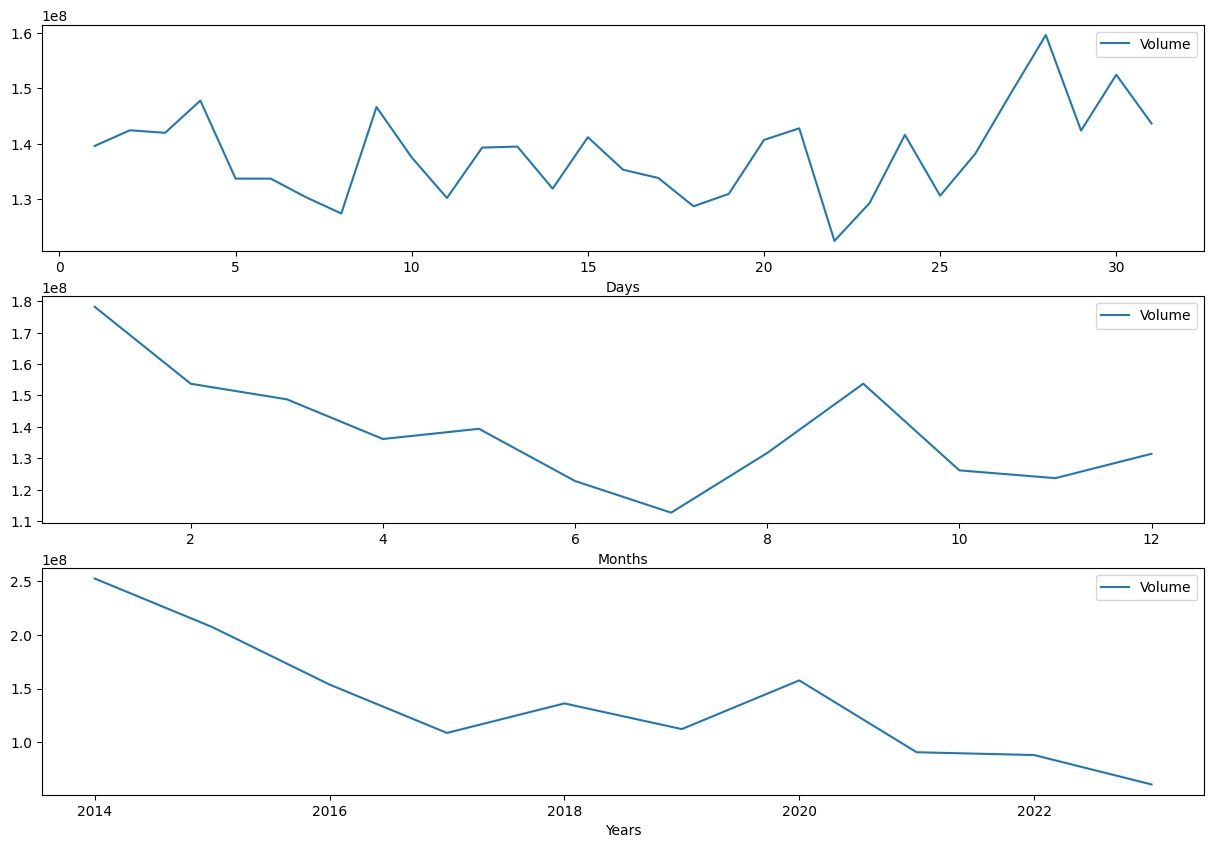

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (15, 10))
df.groupby(df.index.day).mean().plot(y= 'Volume', ax= ax1, xlabel = 'Days')
print(" ")
df.groupby(df.index.month).mean().plot(y= 'Volume', ax= ax2, xlabel = 'Months')
print(" ")
df.groupby(df.index.year).mean().plot(y= 'Volume', ax= ax3, xlabel = 'Yrears')
plt.show()

***Highest Prices of Stock***

In [ ]:
highest_price_of_stock = df.sort_values(by = 'High', ascending= False).head(5)
highest_price_of_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-19,193.100006,198.229996,192.649994,195.100006,194.580551,80507300
2023-07-27,196.020004,197.199997,192.550003,193.220001,192.705551,47460200
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.089188,35175100
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.308609,48291400
2023-07-31,196.059998,196.490005,195.259995,196.449997,195.926956,38824100


***Lowest Prices of Stock***

In [ ]:
lowest_price_of_stock = df.sort_values(by = 'Low', ascending= True).head(5)
lowest_price_of_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-31,17.684999,17.911785,17.626785,17.878571,15.673992,464797200
2014-01-30,17.947857,18.089287,17.739286,17.849285,15.648315,678501600
2014-01-29,17.998215,18.120358,17.807858,17.883928,15.678684,502810000
2014-02-03,17.950357,18.133215,17.832144,17.911785,15.703109,401464000
2014-01-28,18.170000,18.392857,17.931070,18.089287,15.858727,1065523200


# **SUMMARY**

**The average of daily volume of a stock is (138,565,000.00 USD), The maximum volume is (1.065B USD) in year 2014, The minimum volume is (31,428,200 USD). The average daily closing price of the stock is 76.00 USD, All time high of the stock is (198.229996 USD), All time low of the stock is (17.626785 USD). Overall stock price is Bullish which means people are trusting on the APPLE stocks.**